## DSC540 Final Term Project

In [142]:
from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

 ## Import the Life expectancy dataset
 This will read a csv file into a panda dataframe.

In [143]:
df_original = pd.read_csv('Life Expectancy Data.csv')

In [144]:
df_original.head(17)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


Computation of summary 

## Data Munging

In [145]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Computation of summary statistics

In [146]:
df_original.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Set the country column as the index of the dataframe

In [147]:
df_inter = df_original.set_index("Country", inplace = False)
df_inter

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


df_inter.unique("Country")

In [148]:
df_inter["Year"].unique

<bound method Series.unique of Country
Afghanistan    2015
Afghanistan    2014
Afghanistan    2013
Afghanistan    2012
Afghanistan    2011
               ... 
Zimbabwe       2004
Zimbabwe       2003
Zimbabwe       2002
Zimbabwe       2001
Zimbabwe       2000
Name: Year, Length: 2938, dtype: int64>

## Dropping irrelevant columns to our study

In [149]:
irr_columns = ['Adult Mortality', 'infant deaths', 'under-five deaths ', 'percentage expenditure','Hepatitis B', 'Measles ', 'Polio', 'Diphtheria ',  ' HIV/AIDS', ' thinness  1-19 years',  ' thinness 5-9 years', 'Income composition of resources']
df_inter1 = df_inter.drop(irr_columns, axis= 1, inplace = False)
df_inter1.head(16)

,Year,Status,Life expectancy,Alcohol,BMI,Total expenditure,GDP,Population,Schooling
Country,,,,,,,,,
Afghanistan,2015,Developing,65.0,0.01,19.1,8.16,584.259210,33736494.0,10.1
Afghanistan,2014,Developing,59.9,0.01,18.6,8.18,612.696514,327582.0,10.0
Afghanistan,2013,Developing,59.9,0.01,18.1,8.13,631.744976,31731688.0,9.9
Afghanistan,2012,Developing,59.5,0.01,17.6,8.52,669.959000,3696958.0,9.8
Afghanistan,2011,Developing,59.2,0.01,17.2,7.87,63.537231,2978599.0,9.5
Afghanistan,2010,Developing,58.8,0.01,16.7,9.20,553.328940,2883167.0,9.2
Afghanistan,2009,Developing,58.6,0.01,16.2,9.42,445.893298,284331.0,8.9
Afghanistan,2008,Developing,58.1,0.03,15.7,8.33,373.361116,2729431.0,8.7
Afghanistan,2007,Developing,57.5,0.02,15.2,6.73,369.835796,26616792.0,8.4


## Let us look for null values

In [150]:
df_inter1.isnull().sum()

Year                   0
Status                 0
Life expectancy       10
Alcohol              194
 BMI                  34
Total expenditure    226
GDP                  448
Population           652
Schooling            163
dtype: int64

## Let us find duplicate

In [151]:
df_inter1.duplicated().sum()
print("How many duplicated values this dataset has?-{}".format(df_inter1.duplicated().sum()))

How many duplicated values this dataset has?-0


## Renaming columns

In [152]:
df_inter1 = df_inter1.rename(columns={"Life expectancy ":"Life_Expectancy", "Total expenditure":"Total_expenditure", ' BMI ':"BMI"})
df_inter1.head()

,Year,Status,Life_Expectancy,Alcohol,BMI,Total_expenditure,GDP,Population,Schooling
Country,,,,,,,,,
Afghanistan,2015,Developing,65.0,0.01,19.1,8.16,584.259210,33736494.0,10.1
Afghanistan,2014,Developing,59.9,0.01,18.6,8.18,612.696514,327582.0,10.0
Afghanistan,2013,Developing,59.9,0.01,18.1,8.13,631.744976,31731688.0,9.9
Afghanistan,2012,Developing,59.5,0.01,17.6,8.52,669.959000,3696958.0,9.8
Afghanistan,2011,Developing,59.2,0.01,17.2,7.87,63.537231,2978599.0,9.5


## Missing values imputation

In [153]:
#Life expectancy missing values
a = df_inter1.Life_Expectancy.mean()
df_inter1.Life_Expectancy.fillna(a, inplace=True)

In [154]:
#Alcohol
df_inter1.Alcohol.fillna(0.01, inplace=True)

In [155]:
#Total_expenditure
b = df_inter1.Total_expenditure.median()
df_inter1.fillna(b, inplace=True)

In [156]:
#GDP
c = df_inter1.GDP.median()
df_inter1.GDP.fillna(c, inplace=True)

In [157]:
#Population
d = df_inter1.Population.median()
df_inter1.Population.fillna(d, inplace=True)

In [158]:
#Schooling
e = df_inter1.Schooling.median()
df_inter1.Schooling.fillna(e, inplace=True)

In [159]:
#BMI
f = df_inter1.BMI.mean()
df_inter1.BMI.fillna(f, inplace=True)

In [160]:
#Discard the rest of null values
df_inter1.dropna(inplace=True)

In [161]:
df_final = df_inter1
df_final.head()

,Year,Status,Life_Expectancy,Alcohol,BMI,Total_expenditure,GDP,Population,Schooling
Country,,,,,,,,,
Afghanistan,2015,Developing,65.0,0.01,19.1,8.16,584.259210,33736494.0,10.1
Afghanistan,2014,Developing,59.9,0.01,18.6,8.18,612.696514,327582.0,10.0
Afghanistan,2013,Developing,59.9,0.01,18.1,8.13,631.744976,31731688.0,9.9
Afghanistan,2012,Developing,59.5,0.01,17.6,8.52,669.959000,3696958.0,9.8
Afghanistan,2011,Developing,59.2,0.01,17.2,7.87,63.537231,2978599.0,9.5


In [162]:
df_final.describe()

,Year,Life_Expectancy,Alcohol,BMI,Total_expenditure,GDP,Population,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000
mean,2007.518720,69.224932,4.299588,37.944374,5.924098,6342.968968,9.923152e+06,11.646721
std,4.613841,9.507640,4.079052,20.229872,2.400770,13409.086853,5.407586e+07,3.563122
min,2000.000000,36.300000,0.010000,1.000000,0.370000,1.681350,5.755000e+00,0.000000
25%,2004.000000,63.200000,0.470000,19.000000,4.370000,190.174435,5.874250e+03,9.500000
50%,2008.000000,72.000000,3.130000,43.000000,5.755000,1171.983435,5.393575e+05,12.100000
75%,2012.000000,75.600000,7.390000,56.100000,7.330000,4779.405190,4.584371e+06,14.100000
max,2015.000000,89.000000,17.870000,87.300000,17.600000,119172.741800,1.293859e+09,20.700000


## Splitting the dataset by status

In [163]:
#developed
grouped1 = df_final.groupby(df_final.Status)
df_final_dpd = grouped1.get_group("Developed")
df_final_dpd.head()

,Year,Status,Life_Expectancy,Alcohol,BMI,Total_expenditure,GDP,Population,Schooling
Country,,,,,,,,,
Australia,2015,Developed,82.8,0.01,66.6,5.755,56554.38760,23789338.0,20.4
Australia,2014,Developed,82.7,9.71,66.1,9.420,62214.69120,2346694.0,20.4
Australia,2013,Developed,82.5,9.87,65.5,9.360,67792.33860,23117353.0,20.3
Australia,2012,Developed,82.3,10.03,65.0,9.360,67677.63477,22728254.0,20.1
Australia,2011,Developed,82.0,10.30,64.4,9.200,62245.12900,223424.0,19.8


In [164]:
#summary statistics of developed group
df_final_dpd.describe()

,Year,Life_Expectancy,Alcohol,BMI,Total_expenditure,GDP,Population,Schooling
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,5.120000e+02,512.000000
mean,2007.500000,79.197852,9.289883,51.803906,7.441602,19297.432515,5.549419e+06,14.899492
std,4.614281,3.930942,3.496065,17.196829,2.922129,22601.625671,1.359765e+07,3.390547
min,2000.000000,69.900000,0.010000,3.200000,1.100000,5.755000,5.755000e+00,5.755000
25%,2003.750000,76.800000,7.967500,53.775000,6.075000,2192.361373,2.093700e+04,14.200000
50%,2007.500000,79.250000,10.205000,57.450000,7.755000,8477.325445,4.657015e+05,15.500000
75%,2011.250000,81.700000,11.582500,61.300000,9.140000,33607.731703,4.596136e+06,16.600000
max,2015.000000,89.000000,15.190000,69.600000,17.600000,119172.741800,8.253418e+07,20.700000


In [165]:
#developing
grouped2 = df_final.groupby(df_final.Status)
df_final_dpg = grouped2.get_group("Developing")
df_final_dpg.head()

,Year,Status,Life_Expectancy,Alcohol,BMI,Total_expenditure,GDP,Population,Schooling
Country,,,,,,,,,
Afghanistan,2015,Developing,65.0,0.01,19.1,8.16,584.259210,33736494.0,10.1
Afghanistan,2014,Developing,59.9,0.01,18.6,8.18,612.696514,327582.0,10.0
Afghanistan,2013,Developing,59.9,0.01,18.1,8.13,631.744976,31731688.0,9.9
Afghanistan,2012,Developing,59.5,0.01,17.6,8.52,669.959000,3696958.0,9.8
Afghanistan,2011,Developing,59.2,0.01,17.2,7.87,63.537231,2978599.0,9.5


In [166]:
#summary statistics of developing group
df_final_dpg.describe()

,Year,Life_Expectancy,Alcohol,BMI,Total_expenditure,GDP,Population,Schooling
count,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2.426000e+03,2426.000000
mean,2007.522671,67.120177,3.246401,35.019361,5.603833,3608.968417,1.084621e+07,10.960233
std,4.614690,8.988524,3.347921,19.601573,2.143007,8198.331430,5.914172e+07,3.201340
min,2000.000000,36.300000,0.010000,1.000000,0.370000,1.681350,5.755000e+00,0.000000
25%,2004.000000,61.100000,0.242500,18.000000,4.252500,146.780782,3.774500e+03,9.100000
50%,2008.000000,69.050000,2.160000,34.200000,5.630000,741.630748,5.613675e+05,11.600000
75%,2012.000000,74.000000,5.390000,53.075000,6.700000,3527.843386,4.515956e+06,13.100000
max,2015.000000,89.000000,17.870000,87.300000,17.240000,88564.822980,1.293859e+09,18.300000


# Boxplot and outliers identification

Text(0.5, 1.0, 'Life expectancy histogram')

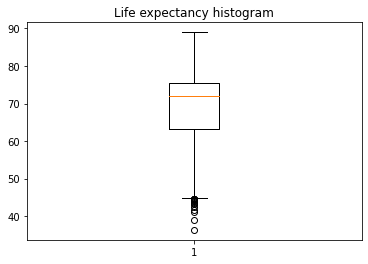

In [167]:
#Life expectancy
matplotlib.pyplot.boxplot(df_final.Life_Expectancy)
matplotlib.pyplot.title("Life expectancy histogram")

Text(0.5, 1.0, 'Population histogram')

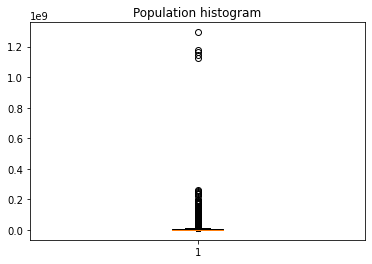

In [168]:
#population
matplotlib.pyplot.boxplot(df_final['Population'])
matplotlib.pyplot.title("Population histogram")

Text(0.5, 1.0, 'schooling histogram')

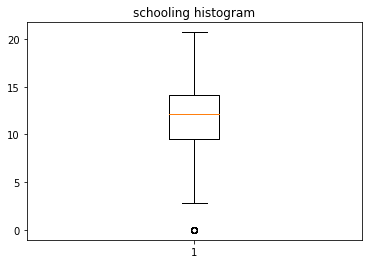

In [169]:
#schooling
matplotlib.pyplot.boxplot(df_final.Schooling)
matplotlib.pyplot.title("schooling histogram")

array([-0.42953634, -0.42741523, -0.42599442, ..., -0.46883809,
       -0.43219707, -0.4322887 ])

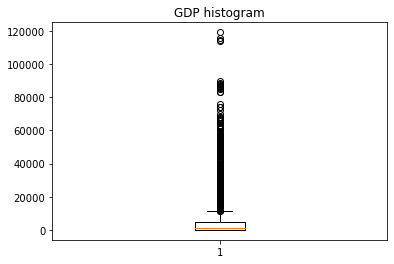

In [170]:
#GDP
matplotlib.pyplot.boxplot(df_final['GDP'])
matplotlib.pyplot.title("GDP histogram")
scipy.stats.zscore(df_final['GDP'])

array([-0.93167082, -0.95639096, -0.98111109, ..., -0.57570092,
       -0.59547702, -0.61525313])

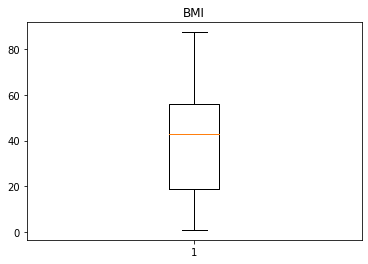

In [171]:
#BMI
matplotlib.pyplot.boxplot(df_final.BMI)
matplotlib.pyplot.title("BMI")
scipy.stats.zscore(df_final.BMI)

array([-1.05179294, -1.05179294, -1.05179294, ...,  0.03197656,
       -0.63250655, -0.64231442])

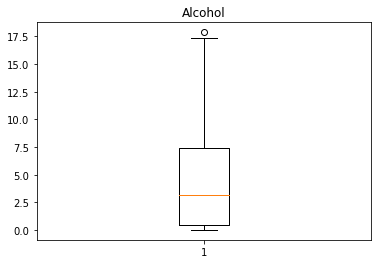

In [172]:
#Alcohol
matplotlib.pyplot.boxplot(df_final.Alcohol)
matplotlib.pyplot.title("Alcohol")
scipy.stats.zscore(df_final.Alcohol)

## New columns addition for outliers effects minimisation

In [173]:
#Add new column to the dataset to minimize outliers effects
df_final['Population_logarithm_base10'] = np.log10(df_final['Population'])
df_final['GDP_logarithm_base10'] = np.log10(df_final['GDP'])
df_final.head()

,Year,Status,Life_Expectancy,Alcohol,BMI,Total_expenditure,GDP,Population,Schooling,Population_logarithm_base10,GDP_logarithm_base10
Country,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,0.01,19.1,8.16,584.259210,33736494.0,10.1,7.528100,2.766606
Afghanistan,2014,Developing,59.9,0.01,18.6,8.18,612.696514,327582.0,10.0,5.515320,2.787245
Afghanistan,2013,Developing,59.9,0.01,18.1,8.13,631.744976,31731688.0,9.9,7.501493,2.800542
Afghanistan,2012,Developing,59.5,0.01,17.6,8.52,669.959000,3696958.0,9.8,6.567845,2.826048
Afghanistan,2011,Developing,59.2,0.01,17.2,7.87,63.537231,2978599.0,9.5,6.474012,1.803028


In [174]:
#without log fonction
df_new= df_final[['Population',]]
df_new_zscore = scipy.stats.zscore(df_new)
df_new_without_outliers = df_new[(df_new_zscore < 3)]
df_z_new = pd.DataFrame(df_new_without_outliers)
print(df_new_without_outliers.shape)
print(df_new.shape)

(2914, 1)
(2938, 1)


In [175]:
#with log10
df_new= df_final[['Population_logarithm_base10',]]
df_new_zscore = scipy.stats.zscore(df_new)
df_new_without_outliers = df_new[(df_new_zscore < 3)]
df_z_new = pd.DataFrame(df_new_without_outliers)
print(df_new_without_outliers.shape)
print(df_new.shape)

(2938, 1)
(2938, 1)


# Web Scraping

In [176]:
import requests as r
from bs4 import BeautifulSoup
import json

In [177]:
# Url variable
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(PPP)'

In [178]:
# parsing all the tables of the url links
dfs = pd.read_html(url)

In [179]:
# parsing the tables of interest(1990-2015)
df1 = dfs[8]
df2 = dfs[11]

## df1 transformation

In [180]:
df1.head()

,Country (or dependent territory),2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,NaN,NaN,19677.0,21784.0,22521.0,25969.0,28190.0,32808.0,34739.0,42209.0
1,Albania,13377.0,14804.0,15721.0,16898.0,18310.0,19923.0,21738.0,23658.0,25927.0,27000.0
2,Algeria,262297.0,276091.0,296164.0,323384.0,346370.0,378230.0,396241.0,420610.0,438910.0,449475.0
3,Angola,53697.0,57183.0,66026.0,69263.0,78918.0,93606.0,107575.0,125941.0,142727.0,145050.0
4,Antigua and Barbuda,1286.0,1249.0,1282.0,1385.0,1504.0,1650.0,1916.0,2150.0,2191.0,1941.0


In [181]:
#info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country (or dependent territory)  195 non-null    object 
 1   2000                              190 non-null    float64
 2   2001                              191 non-null    float64
 3   2002                              192 non-null    float64
 4   2003                              192 non-null    float64
 5   2004                              193 non-null    float64
 6   2005                              193 non-null    float64
 7   2006                              193 non-null    float64
 8   2007                              193 non-null    float64
 9   2008                              193 non-null    float64
 10  2009                              193 non-null    float64
dtypes: float64(10), object(1)
memory usage: 16.9+ KB


In [182]:
#describe
df1.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
count,1.900000e+02,1.910000e+02,1.920000e+02,1.920000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02,1.930000e+02
mean,2.647727e+05,2.756431e+05,2.864878e+05,3.037110e+05,3.266248e+05,3.528472e+05,3.828458e+05,4.141998e+05,4.344058e+05,4.359913e+05
std,8.913287e+05,9.251437e+05,9.599079e+05,1.013004e+06,1.085196e+06,1.170468e+06,1.262875e+06,1.358079e+06,1.418102e+06,1.438807e+06
min,2.200000e+01,2.200000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.600000e+01,2.800000e+01,3.100000e+01,2.900000e+01
25%,7.578500e+03,8.260000e+03,8.685500e+03,9.220000e+03,9.874000e+03,1.080500e+04,1.183500e+04,1.318000e+04,1.373300e+04,1.390200e+04
50%,2.876800e+04,3.111900e+04,3.260950e+04,3.434350e+04,3.666700e+04,4.036800e+04,4.428000e+04,4.799200e+04,5.063200e+04,5.214000e+04
75%,1.758770e+05,1.832615e+05,1.889495e+05,1.996155e+05,2.242570e+05,2.445180e+05,2.603780e+05,2.811540e+05,2.943220e+05,2.890720e+05
max,1.025235e+07,1.058182e+07,1.093645e+07,1.145825e+07,1.221372e+07,1.303662e+07,1.381460e+07,1.445188e+07,1.471282e+07,1.444892e+07


In [183]:
# rename the Country (or dependent territory) to Country
df1 = df1.rename(columns={"Country (or dependent territory)":"Country"})
df1.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,NaN,NaN,19677.0,21784.0,22521.0,25969.0,28190.0,32808.0,34739.0,42209.0
1,Albania,13377.0,14804.0,15721.0,16898.0,18310.0,19923.0,21738.0,23658.0,25927.0,27000.0
2,Algeria,262297.0,276091.0,296164.0,323384.0,346370.0,378230.0,396241.0,420610.0,438910.0,449475.0
3,Angola,53697.0,57183.0,66026.0,69263.0,78918.0,93606.0,107575.0,125941.0,142727.0,145050.0
4,Antigua and Barbuda,1286.0,1249.0,1282.0,1385.0,1504.0,1650.0,1916.0,2150.0,2191.0,1941.0


### Let us look for null values

In [184]:
df1.isnull().sum()

Country    0
2000       5
2001       4
2002       3
2003       3
2004       2
2005       2
2006       2
2007       2
2008       2
2009       2
dtype: int64

In [185]:
# let us find for duplicates
df1.duplicated().sum()
print("How many duplicated values this dataset has?-{}".format(df1.duplicated().sum()))

How many duplicated values this dataset has?-0


In [186]:
# Let us resahpe df1
df11 = pd.melt(df1, id_vars=['Country'])
df11.head()

,Country,variable,value
0,Afghanistan,2000,NaN
1,Albania,2000,13377.0
2,Algeria,2000,262297.0
3,Angola,2000,53697.0
4,Antigua and Barbuda,2000,1286.0


In [187]:
#renaming columns
df11 = df11.rename(columns={"variable":"Year", "value":"GDP1"})
df11.head()

,Country,Year,GDP1
0,Afghanistan,2000,NaN
1,Albania,2000,13377.0
2,Algeria,2000,262297.0
3,Angola,2000,53697.0
4,Antigua and Barbuda,2000,1286.0


In [188]:
df12=df11.sort_values(by =['Country','Year'], ascending=[True,False])
df12.head(10)

,Country,Year,GDP1
1755,Afghanistan,2009,42209.0
1560,Afghanistan,2008,34739.0
1365,Afghanistan,2007,32808.0
1170,Afghanistan,2006,28190.0
975,Afghanistan,2005,25969.0
780,Afghanistan,2004,22521.0
585,Afghanistan,2003,21784.0
390,Afghanistan,2002,19677.0
195,Afghanistan,2001,NaN
0,Afghanistan,2000,NaN


In [189]:
#check for missing values
df12.isnull().sum()

Country     0
Year        0
GDP1       27
dtype: int64

In [190]:
#Fill missing values
df1_inter = df12.ffill().bfill()
df1_inter.isnull().sum()

Country    0
Year       0
GDP1       0
dtype: int64

In [191]:
df1_inter.head(10)

,Country,Year,GDP1
1755,Afghanistan,2009,42209.0
1560,Afghanistan,2008,34739.0
1365,Afghanistan,2007,32808.0
1170,Afghanistan,2006,28190.0
975,Afghanistan,2005,25969.0
780,Afghanistan,2004,22521.0
585,Afghanistan,2003,21784.0
390,Afghanistan,2002,19677.0
195,Afghanistan,2001,19677.0
0,Afghanistan,2000,19677.0


In [192]:
#set Country as index
df1_final = df1_inter.set_index('Country')

In [193]:
df1_final.head()

,Year,GDP1
Country,,
Afghanistan,2009,42209.0
Afghanistan,2008,34739.0
Afghanistan,2007,32808.0
Afghanistan,2006,28190.0
Afghanistan,2005,25969.0


## df2 transformation

In [194]:
df2.head()

,Country (or dependent territory),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,46304.0,50334,59945,63784,69444,72056,70098,74712,77416,81880
1,Albania,28328.0,29655,30530,30604,32529,33595,34736,37609,40080,41709
2,Algeria,471156.0,494947,497330,497988,506135,477358,471382,485802,503436,516522
3,Angola,153871.0,162539,186124,199866,220365,204604,204875,217987,218757,221326
4,Antigua and Barbuda,1814.0,1816,1772,1720,1762,1770,1883,1893,2073,2181


In [195]:
# subsetting df2(from 2010 to 2015)
df21 = df2.iloc[:,[0,1,2,3,4,5,6]]
df21.head()

,Country (or dependent territory),2010,2011,2012,2013,2014,2015
0,Afghanistan,46304.0,50334,59945,63784,69444,72056
1,Albania,28328.0,29655,30530,30604,32529,33595
2,Algeria,471156.0,494947,497330,497988,506135,477358
3,Angola,153871.0,162539,186124,199866,220365,204604
4,Antigua and Barbuda,1814.0,1816,1772,1720,1762,1770


In [196]:
#info
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country (or dependent territory)  195 non-null    object 
 1   2010                              193 non-null    float64
 2   2011                              195 non-null    int64  
 3   2012                              195 non-null    int64  
 4   2013                              195 non-null    int64  
 5   2014                              195 non-null    int64  
 6   2015                              195 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 10.8+ KB


In [197]:
#describe
df21.describe()

,2010,2011,2012,2013,2014,2015
count,1.930000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,4.645022e+05,4.885660e+05,5.142168e+05,5.394746e+05,5.596533e+05,5.713205e+05
std,1.538141e+06,1.634798e+06,1.741544e+06,1.834565e+06,1.919834e+06,1.991018e+06
min,2.900000e+01,3.200000e+01,3.100000e+01,3.300000e+01,3.400000e+01,3.800000e+01
25%,1.487700e+04,1.589650e+04,1.585000e+04,1.759550e+04,1.748400e+04,1.713250e+04
50%,5.520000e+04,5.939200e+04,6.351600e+04,6.836300e+04,7.225000e+04,7.004200e+04
75%,2.982530e+05,3.048095e+05,3.145635e+05,3.309725e+05,3.403030e+05,3.403185e+05
max,1.499205e+07,1.554260e+07,1.619705e+07,1.678482e+07,1.752728e+07,1.823830e+07


### Let us look for null values

In [198]:
df21.isnull().sum()

Country (or dependent territory)    0
2010                                2
2011                                0
2012                                0
2013                                0
2014                                0
2015                                0
dtype: int64

In [199]:
# let us find for duplicates
df21.duplicated().sum()
print("How many duplicated values this dataset has?-{}".format(df21.duplicated().sum()))

How many duplicated values this dataset has?-0


In [200]:
# Let us resahpe df21
df22 = pd.melt(df21, id_vars=['Country (or dependent territory)'])
df22.head()

,Country (or dependent territory),variable,value
0,Afghanistan,2010,46304.0
1,Albania,2010,28328.0
2,Algeria,2010,471156.0
3,Angola,2010,153871.0
4,Antigua and Barbuda,2010,1814.0


In [201]:
##renaming columns
df22 = df22.rename(columns={"Country (or dependent territory)":"Country","variable":"Year", "value":"GDP1"})
df22.head()

,Country,Year,GDP1
0,Afghanistan,2010,46304.0
1,Albania,2010,28328.0
2,Algeria,2010,471156.0
3,Angola,2010,153871.0
4,Antigua and Barbuda,2010,1814.0


In [202]:
df23=df22.sort_values(by =['Country','Year'], ascending=[True,False])
df23.head(10)

,Country,Year,GDP1
975,Afghanistan,2015,72056.0
780,Afghanistan,2014,69444.0
585,Afghanistan,2013,63784.0
390,Afghanistan,2012,59945.0
195,Afghanistan,2011,50334.0
0,Afghanistan,2010,46304.0
976,Albania,2015,33595.0
781,Albania,2014,32529.0
586,Albania,2013,30604.0
391,Albania,2012,30530.0


In [203]:
#check for missing values
df23.isnull().sum()

Country    0
Year       0
GDP1       2
dtype: int64

In [204]:
#Fill missing values
df2_inter = df23.ffill().bfill()
df2_inter.isnull().sum()

Country    0
Year       0
GDP1       0
dtype: int64

In [205]:
#set Country as index
df2_final = df2_inter.set_index('Country')

In [206]:
df2_final.head()

,Year,GDP1
Country,,
Afghanistan,2015,72056.0
Afghanistan,2014,69444.0
Afghanistan,2013,63784.0
Afghanistan,2012,59945.0
Afghanistan,2011,50334.0


In [207]:
# consolidate the two daframes obtained at this stage into one
frames = [df2_final,df1_final]
df_con = pd.concat(frames)

In [208]:
df_con=df_con.sort_values(by =['Country','Year'], ascending=[True,False])
df_con.tail(16)

,Year,GDP1
Country,,
Zimbabwe,2015,37016.0
Zimbabwe,2014,35496.0
Zimbabwe,2013,34187.0
Zimbabwe,2012,31161.0
Zimbabwe,2011,27102.0
Zimbabwe,2010,23247.0
Zimbabwe,2009,19200.0
Zimbabwe,2008,17742.0
Zimbabwe,2007,20799.0


# API Query

In [209]:
service_url = 'https://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.CD?date=2000:2015&per_page=15000&format=json'

In [210]:
response = r.get(service_url)
json_data = response.json()
len(json_data[1])

4256

In [211]:
#strip the brackets from the json_data
for data in json_data[1]:
    print(data)

{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2015', 'value': 893099720325.014, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2014', 'value': 956318682604.139, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2013', 'value': 927655465312.341, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'}, 'countryiso3code': 'AFE', 'date': '2012', 'value': 913197374145.501, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indica

{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'BJ', 'value': 'Benin'}, 'countryiso3code': 'BEN', 'date': '2003', 'value': 5349258092.89116, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'BJ', 'value': 'Benin'}, 'countryiso3code': 'BEN', 'date': '2002', 'value': 4194342689.26268, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'BJ', 'value': 'Benin'}, 'countryiso3code': 'BEN', 'date': '2001', 'value': 3666222633.83624, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'BJ', 'value': 'Benin'}, 'countryiso3code': 'BEN', 'date': '2000', 'value': 3519991440.3235, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'BM', 'va

{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'MR', 'value': 'Mauritania'}, 'countryiso3code': 'MRT', 'date': '2000', 'value': 1779523344.34106, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'MU', 'value': 'Mauritius'}, 'countryiso3code': 'MUS', 'date': '2015', 'value': 11692287066.381, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'MU', 'value': 'Mauritius'}, 'countryiso3code': 'MUS', 'date': '2014', 'value': 12803438964.9438, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'MU', 'value': 'Mauritius'}, 'countryiso3code': 'MUS', 'date': '2013', 'value': 12129658758.3254, 'unit': '', 'obs_status': '', 'decimal': 0}
{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country':

In [212]:
#function to extract country name, year and GDP value and transform to a dataframe
def get_values():
    data_dict = {'Country':[], 'Year':[], 'value':[]}
    json_data[1]
    for data in json_data[1]:
        data_dict['Country'].append(data['country']['value'])
        data_dict['Year'].append(data['date'])
        data_dict['value'].append(data['value'])
        
    return pd.DataFrame(data_dict)

In [213]:
df_api = get_values()
df_api.head()

,Country,Year,value
0,Africa Eastern and Southern,2015,8.930997e+11
1,Africa Eastern and Southern,2014,9.563187e+11
2,Africa Eastern and Southern,2013,9.276555e+11
3,Africa Eastern and Southern,2012,9.131974e+11
4,Africa Eastern and Southern,2011,8.962561e+11


In [214]:
#info
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4256 non-null   object 
 1   Year     4256 non-null   object 
 2   value    4054 non-null   float64
dtypes: float64(1), object(2)
memory usage: 99.9+ KB


In [215]:
#describe
df_api.describe()

,value
count,4.054000e+03
mean,1.786522e+12
std,6.597397e+12
min,1.319654e+07
25%,5.149653e+09
50%,3.195548e+10
75%,4.001422e+11
max,7.946886e+13


In [216]:
#### Let us look for null values
df_api.isnull().sum()

Country      0
Year         0
value      202
dtype: int64

In [217]:
# let us find for duplicates
df_api.duplicated().sum()
print("How many duplicated values this dataset has?-{}".format(df_api.duplicated().sum()))

How many duplicated values this dataset has?-0


In [218]:
##renaming columns
df_api = df_api.rename(columns={"value":"GDP2"})
df_api.head()

,Country,Year,GDP2
0,Africa Eastern and Southern,2015,8.930997e+11
1,Africa Eastern and Southern,2014,9.563187e+11
2,Africa Eastern and Southern,2013,9.276555e+11
3,Africa Eastern and Southern,2012,9.131974e+11
4,Africa Eastern and Southern,2011,8.962561e+11


In [219]:
#Fill missing values
df_api_inter = df_api.ffill().bfill()
df_api_inter.isnull().sum()

Country    0
Year       0
GDP2       0
dtype: int64

In [220]:
#set Country as index
df_api_final = df_api_inter.set_index('Country')

In [221]:
df_api_final.head()

,Year,GDP2
Country,,
Africa Eastern and Southern,2015,8.930997e+11
Africa Eastern and Southern,2014,9.563187e+11
Africa Eastern and Southern,2013,9.276555e+11
Africa Eastern and Southern,2012,9.131974e+11
Africa Eastern and Southern,2011,8.962561e+11


# Database Query

In [222]:
#import sqlalchemy
from sqlalchemy import create_engine

In [223]:
#create a new engine
engine =create_engine('sqlite:///final_project.sqlite')

In [224]:
#establish connection to engine
conn = engine.raw_connection()

In [225]:
#Load data frames into the database
df_con.to_sql(con=engine,name='Wiki_Dataframe', if_exists='replace')
df_api_final.to_sql(con=engine,name='API_Dataframe', if_exists='replace')
df_final.to_sql(con=engine,name='CSV_Dataframe', if_exists='replace')

In [226]:
cursor = conn.cursor()

In [227]:
for row in cursor.execute('SELECT * FROM CSV_Dataframe;'):
    print(row)

('Afghanistan', 2015, 'Developing', 65.0, 0.01, 19.1, 8.16, 584.2592099999999, 33736494.0, 10.1, 7.528099947382646, 2.766605567141547)
('Afghanistan', 2014, 'Developing', 59.9, 0.01, 18.6, 8.18, 612.696514, 327582.0, 10.0, 5.515320030098628, 2.7872454093757426)
('Afghanistan', 2013, 'Developing', 59.9, 0.01, 18.1, 8.13, 631.744976, 31731688.0, 9.9, 7.50149317545958, 2.8005417968457667)
('Afghanistan', 2012, 'Developing', 59.5, 0.01, 17.6, 8.52, 669.959, 3696958.0, 9.8, 6.567844516715424, 2.8260482256581505)
('Afghanistan', 2011, 'Developing', 59.2, 0.01, 17.2, 7.87, 63.537231000000006, 2978599.0, 9.5, 6.474012039364923, 1.8030282840255278)
('Afghanistan', 2010, 'Developing', 58.8, 0.01, 16.7, 9.2, 553.32894, 2883167.0, 9.2, 6.459869798502659, 2.7429833851131664)
('Afghanistan', 2009, 'Developing', 58.6, 0.01, 16.2, 9.42, 445.89329789999994, 284331.0, 8.9, 5.453824212469142, 2.649230944637291)
('Afghanistan', 2008, 'Developing', 58.1, 0.03, 15.7, 8.33, 373.3611163, 2729431.0, 8.7, 6.436

('Grenada', 2014, 'Developing', 73.5, 8.42, 47.4, 6.1, 8569.776998000001, 5.755, 15.8, 0.7600453279658106, 3.9329695208965783)
('Grenada', 2013, 'Developing', 73.3, 8.25, 46.5, 6.15, 7955.6159849999995, 5.755, 15.8, 0.7600453279658106, 3.9006738117047224)
('Grenada', 2012, 'Developing', 73.1, 8.07, 45.6, 6.36, 7583.1872, 5.755, 15.8, 0.7600453279658106, 3.879851777194991)
('Grenada', 2011, 'Developing', 72.9, 7.84, 44.7, 6.35, 741.48438, 5.755, 15.8, 0.7600453279658106, 2.8701020066776053)
('Grenada', 2010, 'Developing', 72.6, 7.91, 43.9, 6.41, 7365.666659, 5.755, 15.8, 0.7600453279658106, 3.867212060509573)
('Grenada', 2009, 'Developing', 72.4, 8.42, 43.1, 6.24, 7395.88125, 5.755, 15.6, 0.7600453279658106, 3.8689899294092887)
('Grenada', 2008, 'Developing', 72.1, 8.92, 42.4, 5.76, 7946.944345999999, 5.755, 15.4, 0.7600453279658106, 3.900200171578649)
('Grenada', 2007, 'Developing', 71.9, 9.06, 41.8, 5.88, 7322.596862, 5.755, 15.3, 0.7600453279658106, 3.8646651251612676)
('Grenada', 20

('Portugal', 2014, 'Developed', 89.0, 9.88, 6.9, 9.5, 2277.53613, 14162.0, 16.8, 4.151124590050682, 3.35746527518847)
('Portugal', 2013, 'Developed', 86.0, 10.0, 6.2, 9.55, 21618.73534, 1457295.0, 16.3, 6.163547474833783, 4.334830284856707)
('Portugal', 2012, 'Developed', 83.0, 11.96, 59.5, 9.74, 2577.4264, 1514844.0, 16.3, 6.180367911103979, 3.411186272585917)
('Portugal', 2011, 'Developed', 82.0, 11.92, 58.8, 1.7, 23196.18375, 155756.0, 16.2, 5.192444785454491, 4.365416540380324)
('Portugal', 2010, 'Developed', 79.6, 12.25, 58.1, 1.44, 22538.6548, 15731.0, 16.0, 4.196756331057987, 4.352927991995322)
('Portugal', 2009, 'Developed', 79.3, 12.03, 57.3, 1.42, 2363.97161, 1568247.0, 16.0, 6.195414465420472, 3.3736422566024595)
('Portugal', 2008, 'Developed', 79.0, 12.35, 56.5, 9.9, 24815.6884, 1558177.0, 15.8, 6.192616789509286, 4.394726327253452)
('Portugal', 2007, 'Developed', 78.7, 12.57, 55.7, 9.62, 2278.5845, 1542964.0, 15.4, 6.188355793345236, 3.357665138779013)
('Portugal', 2006, '

In [228]:
# join the 3 datasets together into the database
query = """
SELECT 
    CSV.*
    , 
    API.*
    , 
    Wiki.*
    
FROM
	CSV_Dataframe AS CSV
	LEFT JOIN API_Dataframe AS API 
		ON CSV.Country = API.Country
		AND API.Year=CSV.Year
	LEFT JOIN Wiki_Dataframe AS Wiki
		ON CSV.Country = Wiki.Country
		AND CSV.Year = Wiki.Year
ORDER BY Country ASC,Year DESC;
"""

In [229]:
# define the new dataframe df_s
df_s = pd.read_sql(query,conn)
df_s.head(16)

,Country,Year,Status,Life_Expectancy,Alcohol,BMI,Total_expenditure,GDP,Population,Schooling,Population_logarithm_base10,GDP_logarithm_base10,Country,Year,GDP2,Country,Year,GDP1
0,Afghanistan,2015,Developing,65.0,0.01,19.1,8.16,584.259210,33736494.0,10.1,7.528100,2.766606,Afghanistan,2015,1.990711e+10,Afghanistan,2015,72056.0
1,Afghanistan,2014,Developing,59.9,0.01,18.6,8.18,612.696514,327582.0,10.0,5.515320,2.787245,Afghanistan,2014,2.048489e+10,Afghanistan,2014,69444.0
2,Afghanistan,2013,Developing,59.9,0.01,18.1,8.13,631.744976,31731688.0,9.9,7.501493,2.800542,Afghanistan,2013,2.056107e+10,Afghanistan,2013,63784.0
3,Afghanistan,2012,Developing,59.5,0.01,17.6,8.52,669.959000,3696958.0,9.8,6.567845,2.826048,Afghanistan,2012,2.000160e+10,Afghanistan,2012,59945.0
4,Afghanistan,2011,Developing,59.2,0.01,17.2,7.87,63.537231,2978599.0,9.5,6.474012,1.803028,Afghanistan,2011,1.780429e+10,Afghanistan,2011,50334.0
5,Afghanistan,2010,Developing,58.8,0.01,16.7,9.20,553.328940,2883167.0,9.2,6.459870,2.742983,Afghanistan,2010,1.585657e+10,Afghanistan,2010,46304.0
6,Afghanistan,2009,Developing,58.6,0.01,16.2,9.42,445.893298,284331.0,8.9,5.453824,2.649231,Afghanistan,2009,1.243909e+10,Afghanistan,2009,42209.0
7,Afghanistan,2008,Developing,58.1,0.03,15.7,8.33,373.361116,2729431.0,8.7,6.436072,2.572129,Afghanistan,2008,1.010923e+10,Afghanistan,2008,34739.0
8,Afghanistan,2007,Developing,57.5,0.02,15.2,6.73,369.835796,26616792.0,8.4,7.425156,2.568009,Afghanistan,2007,9.747880e+09,Afghanistan,2007,32808.0
9,Afghanistan,2006,Developing,57.3,0.03,14.7,7.43,272.563770,2589345.0,8.1,6.413190,2.435468,Afghanistan,2006,6.971286e+09,Afghanistan,2006,28190.0


In [230]:
#Add the new table in the database 
df_s.to_sql(con=engine,name='Three_Dataframe', if_exists='replace')

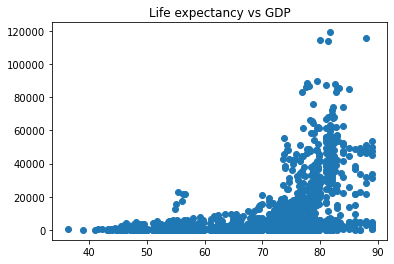

In [231]:
#Life expectancy vs GDP
query1 = """
SELECT Life_Expectancy,GDP
FROM Three_Dataframe
GROUP BY Life_Expectancy,GDP
"""
df_s1 = pd.read_sql(query1,conn)

plt.scatter(df_s1.Life_Expectancy, df_s1.GDP)
plt.title("Life expectancy vs GDP")
plt.show()

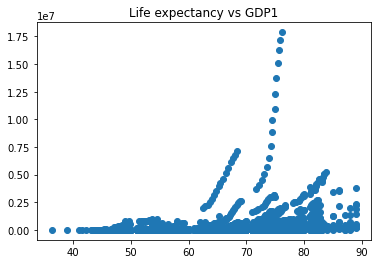

In [232]:
#life expectancy vs GDP1
query2 = """
SELECT Life_Expectancy,GDP1
FROM Three_Dataframe
GROUP BY Life_Expectancy,GDP1
"""
df_s1 = pd.read_sql(query2,conn)

plt.scatter(df_s1.Life_Expectancy, df_s1.GDP1)
plt.title("Life expectancy vs GDP1")
plt.show()

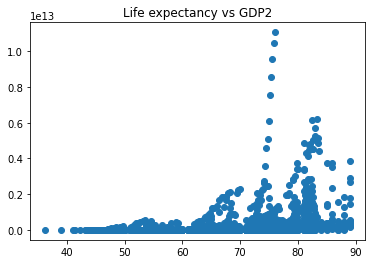

In [233]:
#life expectancy vs GDP2
query3 = """
SELECT Life_Expectancy,GDP2, COUNT(*)
FROM Three_Dataframe
GROUP BY Life_Expectancy,GDP2
"""
df_s2 = pd.read_sql(query3,conn)

plt.scatter(df_s2.Life_Expectancy, df_s2.GDP2,)
plt.title("Life expectancy vs GDP2")
plt.show()

Text(0.5, 1.0, 'Life expectancy histogram')

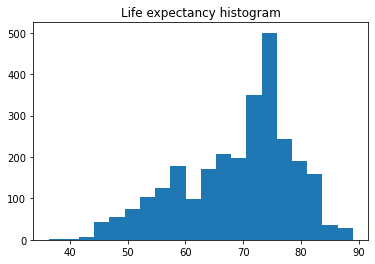

In [234]:
#Life expectancy Histogram
matplotlib.pyplot.hist(df_s1.Life_Expectancy, bins = 20)
matplotlib.pyplot.title("Life expectancy histogram")

<AxesSubplot:>

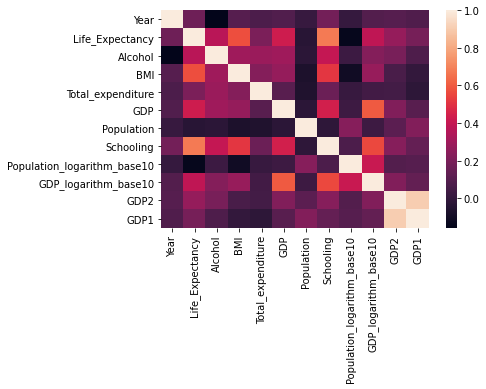

In [235]:
#heatmap of correlation
sns.heatmap(df_s.corr())